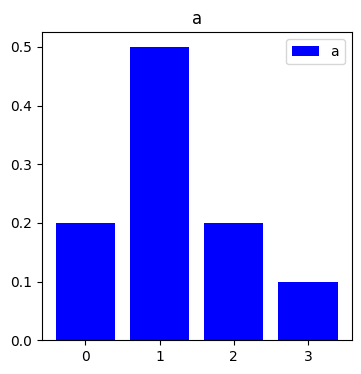

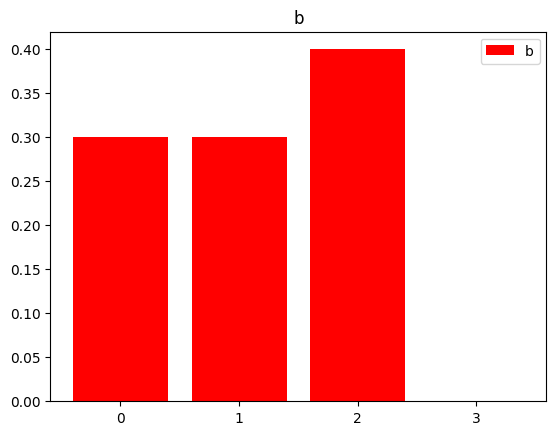

[[1.99998904e-01 1.15641967e-08 1.08420994e-06 0.00000000e+00]
 [1.06895885e-02 2.99873771e-01 1.89436641e-01 0.00000000e+00]
 [7.60078239e-05 1.43669104e-05 1.99909625e-01 0.00000000e+00]
 [8.92314728e-02 1.13645105e-04 1.06548821e-02 0.00000000e+00]]


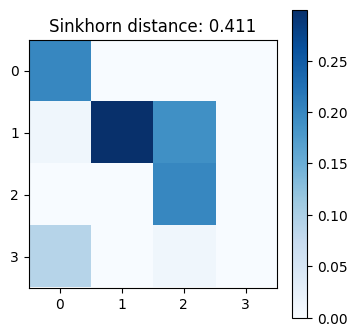

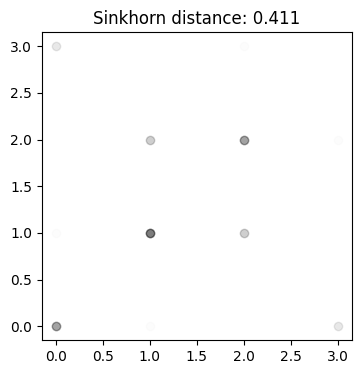

3.2088604
3.1174953
3.0232484
2.9263613
2.827098
2.725518
2.6218207
2.5167713
2.4113655
2.3057308
2.1994576
2.0937524
1.9895481
1.8866065
1.7951382
1.7018709
1.6073098
1.5113177
1.4144244
1.3174374


/var/folders/dh/ybvm9_5n0lq6kh0_h75bkz240000gn/T/ipykernel_10125/2611917008.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 4))


1.2207036
1.1242537
1.0282006
0.93279
0.8424251
0.75934005
0.6773381
0.59593827
0.52477604
0.46163645
0.4004418
0.33925393
0.2882574
0.24352226
0.2030417
35


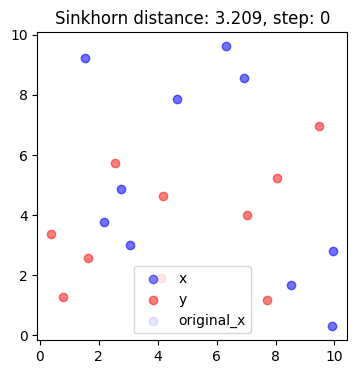

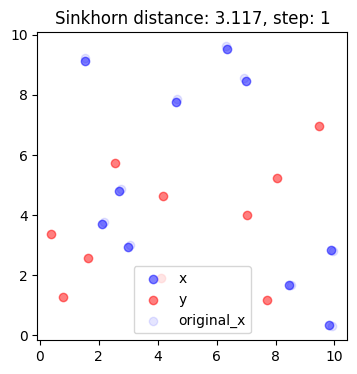

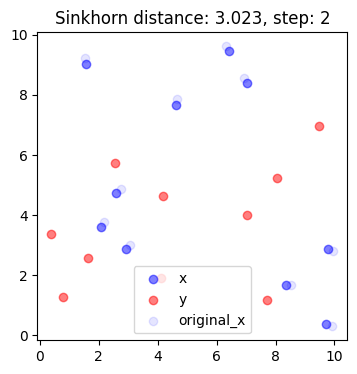

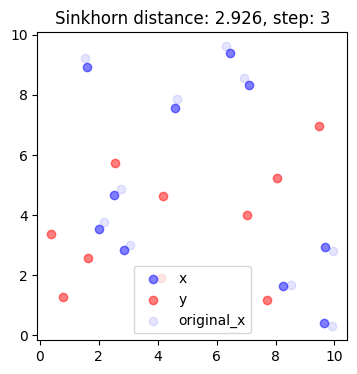

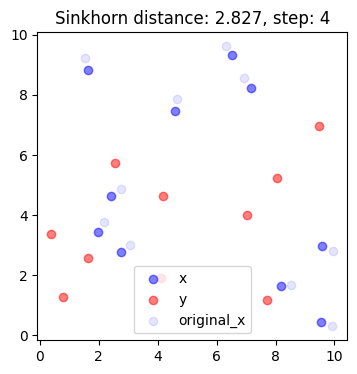

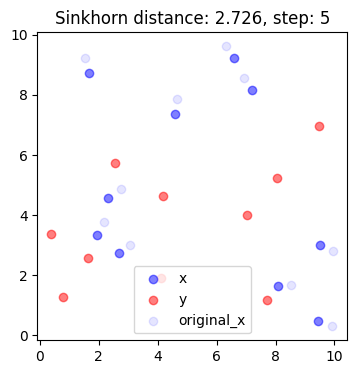

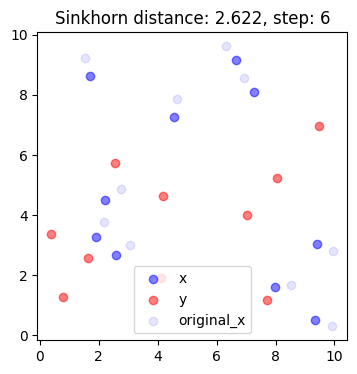

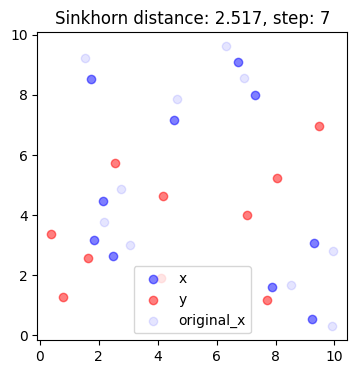

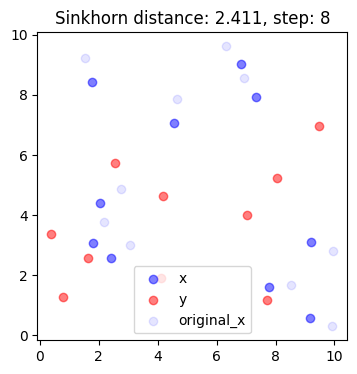

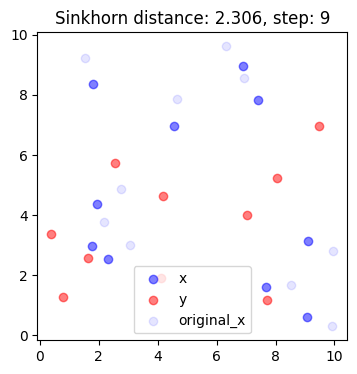

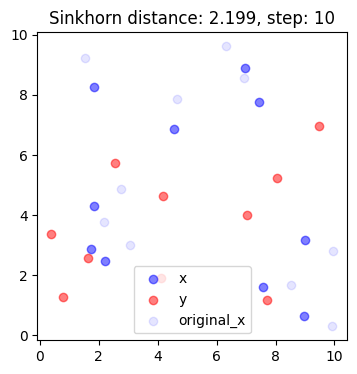

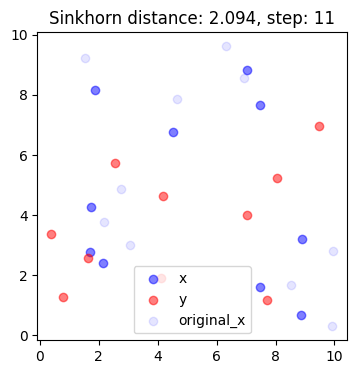

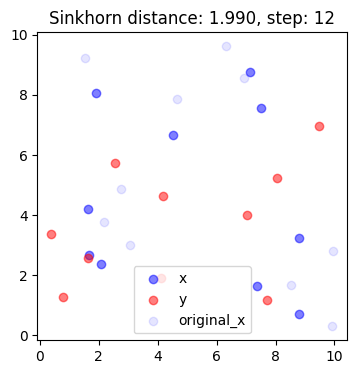

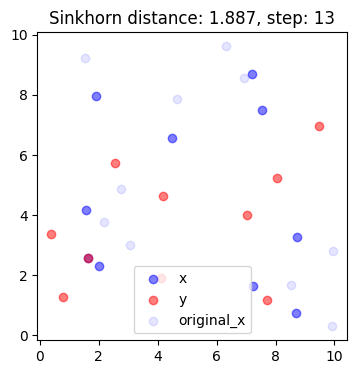

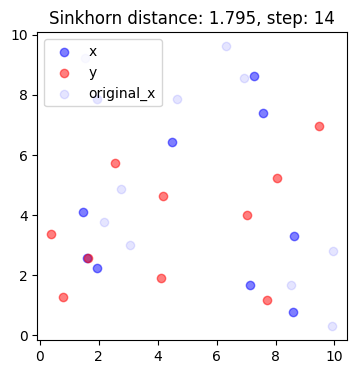

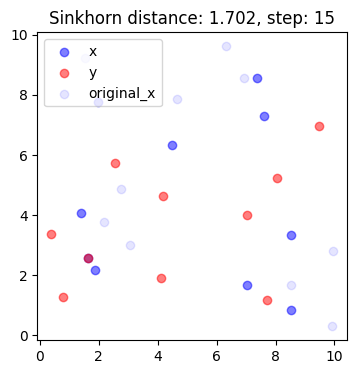

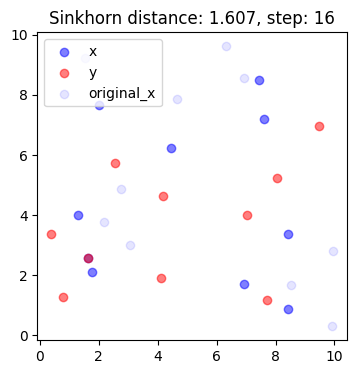

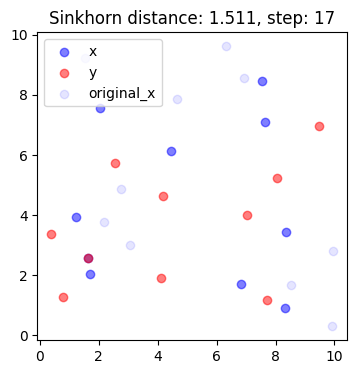

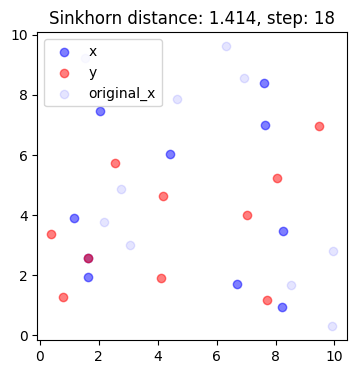

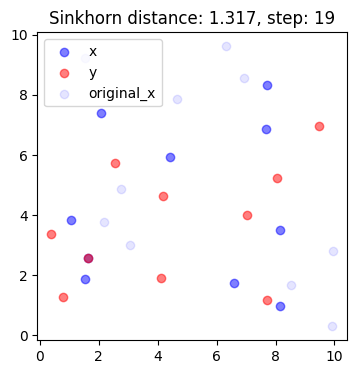

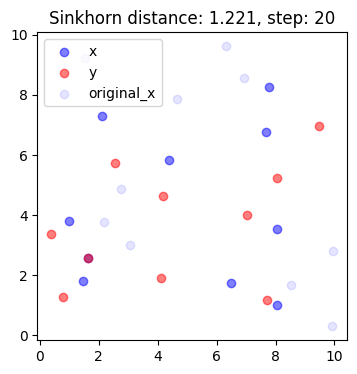

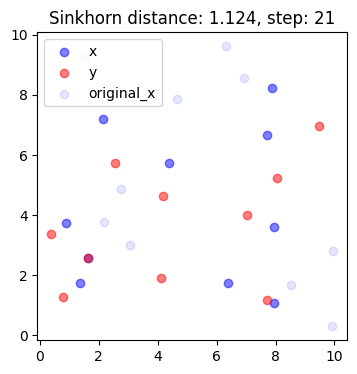

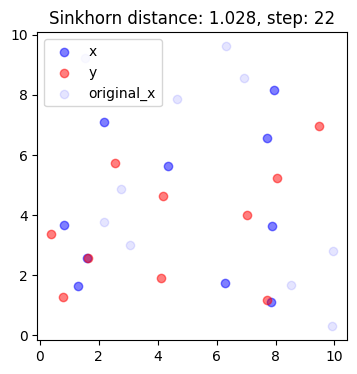

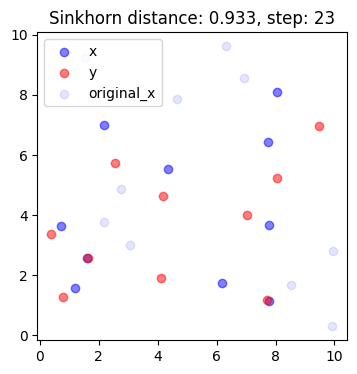

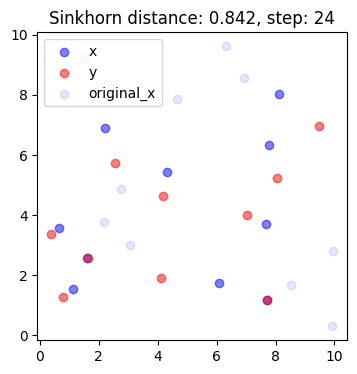

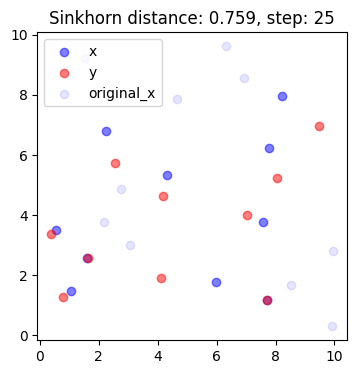

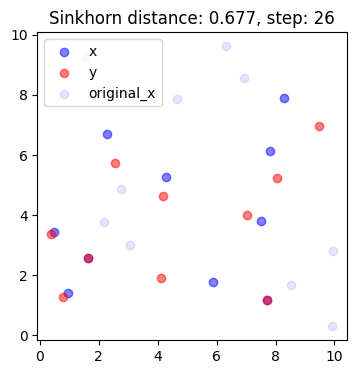

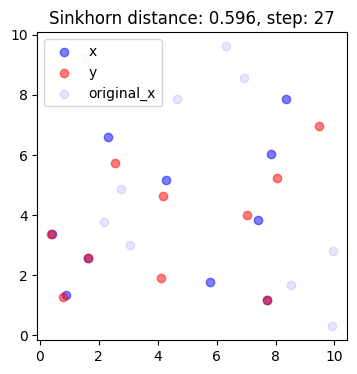

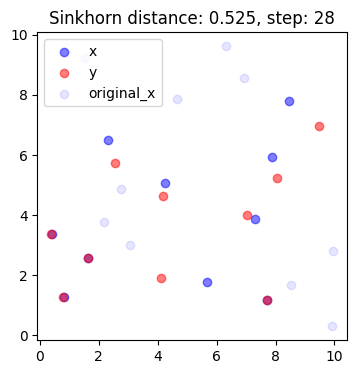

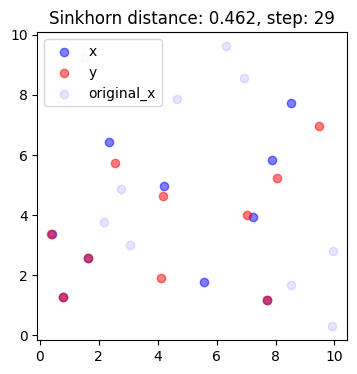

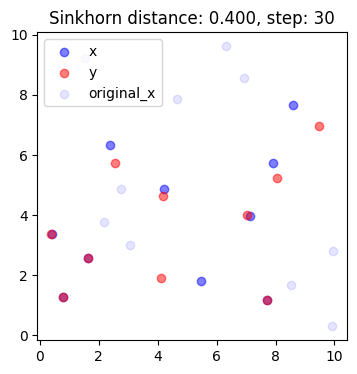

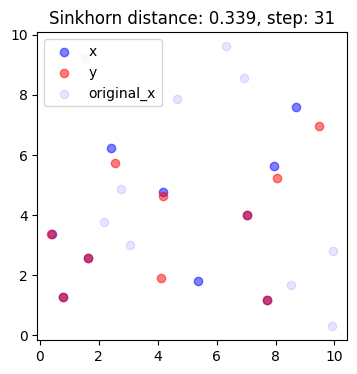

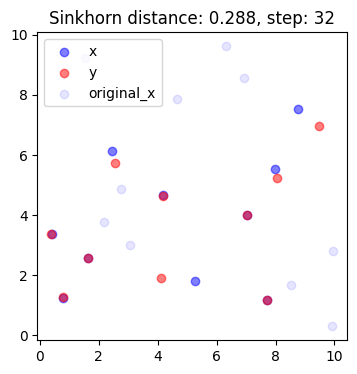

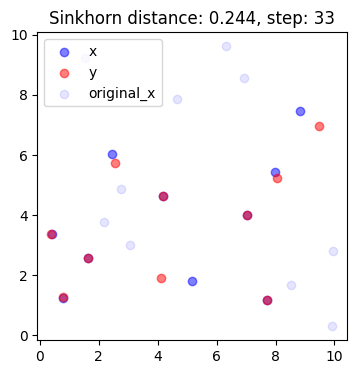

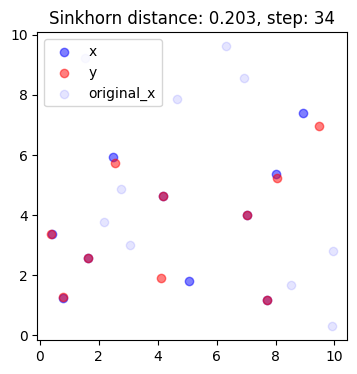

<Figure size 400x400 with 0 Axes>

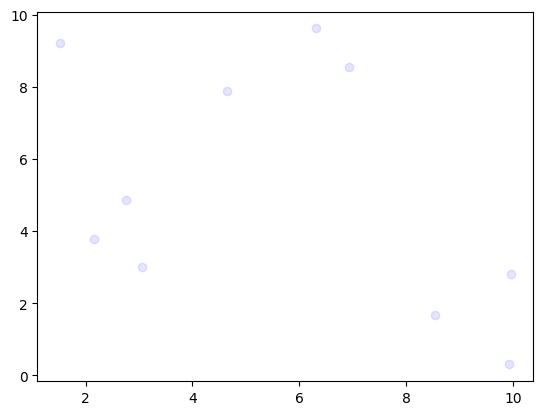

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp


# 入力例
n, m = 4, 4
C = np.array([
    [0, 2, 2, 2],
    [2, 0, 1, 2],
    [2, 1, 0, 2],
    [2, 2, 2, 0]]
)
a = np.array([0.2, 0.5, 0.2, 0.1])
b = np.array([0.3, 0.3, 0.4, 0.0])
eps = 0.2

# plot a, b in 1D
plt.figure(figsize=(4, 4))
plt.bar(np.arange(n), a, color="blue", label="a")
plt.xticks(np.arange(n))
plt.title("a")
plt.legend()
plt.show()
plt.bar(np.arange(n), b, color="red", label="b")
plt.xticks(np.arange(n))
plt.title("b")
plt.legend()
plt.show()


# シンクホーンアルゴリズム
K = np.exp(- C / eps)
u = np.ones(n)
for i in range(100):
    v = b / (K.T @ u)
    u = a / (K @ v)
P = u.reshape(n, 1) * K * v.reshape(1, m)
d = (C * P).sum()
print(P)
# 図示
plt.figure(figsize=(4, 4))
plt.imshow(P, cmap="Blues")
plt.colorbar()
plt.yticks(np.arange(n))
plt.title(f"Sinkhorn distance: {d:.3f}")
plt.show()

# plot transport plan
plt.figure(figsize=(4, 4))
for i in range(n):
    for j in range(m):
        plt.scatter([i, j], [j, i], color="black", alpha=P[i, j])
plt.title(f"Sinkhorn distance: {d:.3f}")
plt.show()













n,m = 10,10

# gradient flow of Sinkhorn divergence
def Sinkhorn(a, b, x, y, eps):
    C = jnp.zeros((n, m))
    for i in range(n):
        for j in range(m):
            C = C.at[i,j].set(jnp.linalg.norm(x[i] - y[j]))
    K = jnp.exp(- C / eps)
    u = jnp.ones(n)
    v = jnp.ones(m)
    for i in range(100):
        v = v.at[:].set(b / (K.T @ u))
        u = u.at[:].set(a / (K @ v))
    P = u.reshape(n, 1) * K * v.reshape(1, m)
    d = (C * P).sum()
    return d, P

x = jax.random.uniform(jax.random.PRNGKey(0), (n, 2)) * 10
y = jax.random.uniform(jax.random.PRNGKey(1), (m, 2)) * 10 + jnp.array([0, 1])
original_x = x.copy()
a = jnp.ones(n) / n
b = jnp.ones(m) / m
eps = 0.2
d = 1e10
i = 0
# animation of plot
import matplotlib.animation as animation
ims = []



x_list = []
y_list = []
while d > 0.2:
    d, P = Sinkhorn(a, b, x, y, eps)
    # plot x,y, and array of x
    if i % 10 == 0:
        plt.figure(figsize=(4, 4))
        plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
        plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
        plt.scatter(original_x[:, 0], original_x[:, 1], color="blue", alpha=0.1, label="original_x")
        plt.legend()
        plt.title(f"Sinkhorn distance: {d:.3f}, step: {i//10}")
        #plt.show()
        x_list.append(x)
        y_list.append(y)
        print(d)

    # gradient of d wrt x
    grad_x = jax.grad(lambda x: Sinkhorn(a, b, x, y, eps)[0])(x)
    #print(grad_x)
    x -= 0.1 * grad_x
    i += 1

fig = plt.figure(figsize=(4, 4))



fig, ax = plt.subplots()
scat3 = plt.scatter(original_x[:, 0], original_x[:, 1], color="blue", alpha=0.1, label="original_x")
def update(frame):
    # for each frame, update the data stored on each artist.
    x = x_list[frame]
    y = y_list[frame]
    scat = plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
    scat2 = plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
    return scat, scat2
print(len(x_list))
anim = animation.FuncAnimation(fig, update, interval=100, frames=len(x_list))
plt.show()




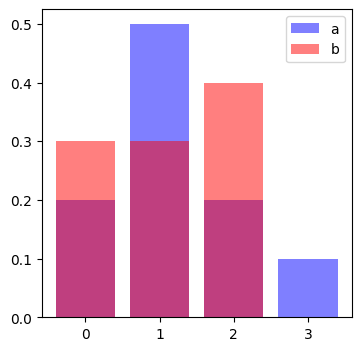

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 入力例
n, m = 4, 4
C = np.array([
    [0, 2, 2, 2],
    [2, 0, 1, 2],
    [2, 1, 0, 2],
    [2, 2, 2, 0]]
)
a = np.array([0.2, 0.5, 0.2, 0.1])
b = np.array([0.3, 0.3, 0.4, 0.0])
eps = 0.2

# plot a, b in 1D
plt.figure(figsize=(4, 4))
plt.bar(np.arange(n), a, color="blue", label="a", alpha=0.5)
plt.bar(np.arange(n), b, color="red", label="b", alpha=0.5)
plt.legend()
plt.show()

[[1.99998904e-01 1.15641967e-08 1.08420994e-06 0.00000000e+00]
 [1.06895885e-02 2.99873771e-01 1.89436641e-01 0.00000000e+00]
 [7.60078239e-05 1.43669104e-05 1.99909625e-01 0.00000000e+00]
 [8.92314728e-02 1.13645105e-04 1.06548821e-02 0.00000000e+00]]


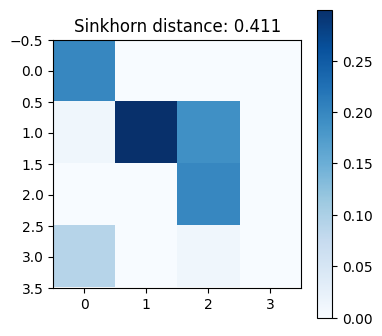

In [3]:
# シンクホーンアルゴリズム
K = np.exp(- C / eps)
u = np.ones(n)
for i in range(100):
    v = b / (K.T @ u)
    u = a / (K @ v)
P = u.reshape(n, 1) * K * v.reshape(1, m)
d = (C * P).sum()
print(P)
# 図示
plt.figure(figsize=(4, 4))
plt.imshow(P, cmap="Blues")
plt.colorbar()
plt.title(f"Sinkhorn distance: {d:.3f}")
plt.show()


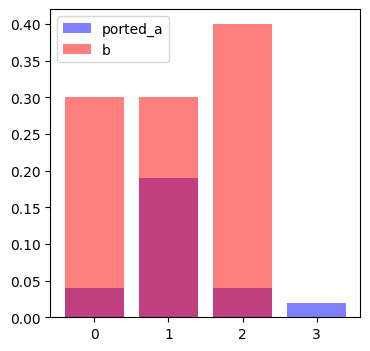

In [4]:
# transported a
ported_a = P @ a
plt.figure(figsize=(4, 4))
plt.bar(np.arange(n), ported_a, color="blue", label="ported_a", alpha=0.5)
plt.bar(np.arange(n), b, color="red", label="b", alpha=0.5)
plt.legend()
plt.show()



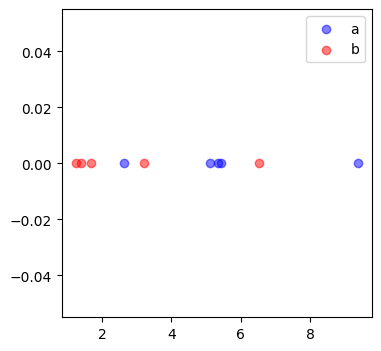

In [5]:
# point cloud in 2D transport
n, m = 5, 5
a = np.random.rand(n) * 10
b = np.random.rand(m) * 10

# plot a, b in 2D
plt.figure(figsize=(4, 4))
plt.scatter(a, np.zeros(n), color="blue", label="a", alpha=0.5)
plt.scatter(b, np.zeros(m), color="red", label="b", alpha=0.5)
plt.legend()
plt.show()


[[9.25756918e-01 2.28737637e+00 8.35947810e-01 6.84590257e-01
  6.17330615e-01]
 [3.70707454e-24 3.46046575e-05 1.03485668e+00 8.47484490e-01
  7.64220812e-01]
 [2.61228686e+00 1.45413937e+00 5.31431833e-01 4.35210250e-01
  3.92451702e-01]
 [9.36783779e+00 2.05719004e-09 7.51823587e-10 6.15697650e-10
  5.55206571e-10]
 [6.77751052e-03 2.63168800e+00 9.61780423e-01 7.87639490e-01
  7.10255465e-01]]


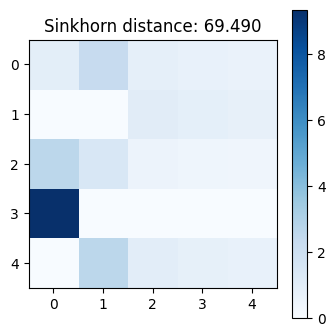

In [6]:
C = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        C[i, j] = np.linalg.norm(a[i] - b[j])
eps = 0.1
K = np.exp(- C / eps)
u = np.ones(n)
for i in range(100):
    v = b / (K.T @ u)
    u = a / (K @ v)
P = u.reshape(n, 1) * K * v.reshape(1, m)
d = (C * P).sum()
print(P)
# 図示
plt.figure(figsize=(4, 4))
plt.imshow(P, cmap="Blues")
plt.colorbar()
plt.title(f"Sinkhorn distance: {d:.3f}")
plt.show()

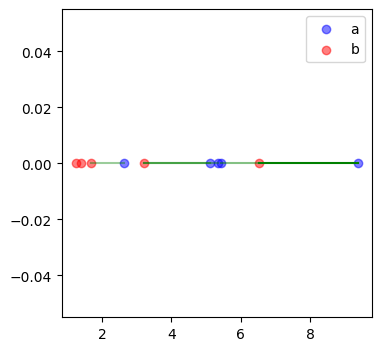

In [7]:
# plot a, b and array of a in 2D
plt.figure(figsize=(4, 4))
plt.scatter(a, np.zeros(n), color="blue", label="a", alpha=0.5)
plt.scatter(b, np.zeros(m), color="red", label="b", alpha=0.5)

target = np.zeros(n)
for i in range(n):
    target[i] = b[np.argmax(P[i])]
    plt.plot([a[i], target[i]], [0, 0], color="green", alpha=P[i].max() / P[i].sum())
plt.legend()
plt.show()



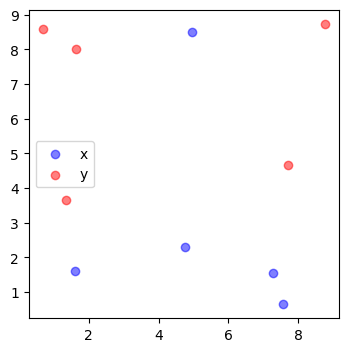

In [8]:
# 2 dimentional point cloud
n, m = 5, 5
x = np.random.rand(n, 2) * 10
y = np.random.rand(m, 2) * 10
C = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        C[i, j] = np.linalg.norm(x[i] - y[j])


# plot x, y in 2D
plt.figure(figsize=(4, 4))
plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
plt.legend()



nan
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


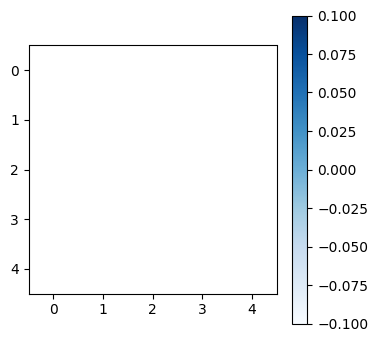

In [14]:
# Sinkhorn algorithm in 2D
def Sinkhorn(a, b, C, eps):
    K = jnp.exp(- C / eps)
    u = jnp.ones(n)
    for i in range(100):
        v = b / (K.T @ u)
        u = a / (K @ v)
    P = u.reshape(n, 1) * K * v.reshape(1, m)
    d = (C * P).sum()
    return d, P
a = np.ones(n) / n
b = np.ones(m) / m
d, P = Sinkhorn(a, b, C, eps=0.1)
print(d)
print(P)
# plot P
plt.figure(figsize=(4, 4))
plt.imshow(P, cmap="Blues")
plt.colorbar()
plt.show()





TypeError: alpha must be numeric or None, not <class 'jaxlib.xla_extension.ArrayImpl'>

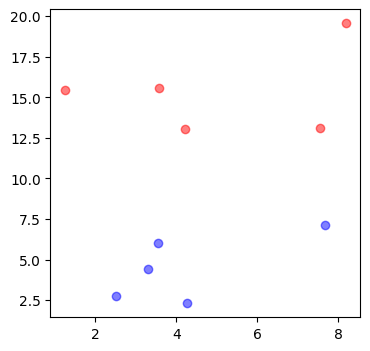

In [17]:
# Plot transport plan
plt.figure(figsize=(4, 4))
plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot([x[i, 0], y[j, 0]], [x[i, 1], y[j, 1]], color="green", alpha=P[i, j])
plt.legend()
plt.show()


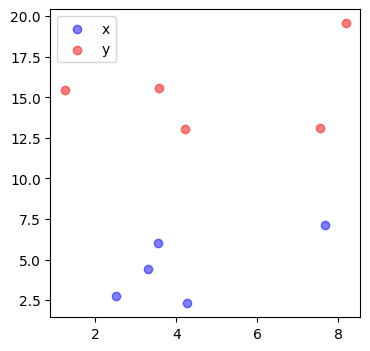

11.006061
[[7.53308833e-03 3.20875570e-02 5.96603826e-02 4.30934727e-02
  5.76254912e-02]
 [9.37835798e-02 1.67692751e-02 5.11713438e-02 0.00000000e+00
  3.82758044e-02]
 [9.95137170e-03 4.62018102e-02 5.06255589e-02 4.08554897e-02
  5.23657836e-02]
 [4.85003321e-03 1.04941234e-01 3.85047980e-02 0.00000000e+00
  5.17039262e-02]
 [8.38819221e-02 1.27020940e-07 3.79171397e-05 1.16051041e-01
  2.89968757e-05]]


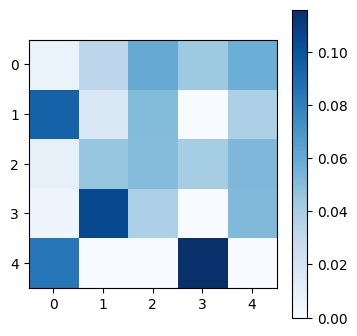

In [34]:
# gradient flow of Sinkhorn divergence
import jax.numpy as jnp
import jax
n,m = 5, 5
x = jax.random.uniform(jax.random.PRNGKey(0), (n, 2)) * 10
y = jax.random.uniform(jax.random.PRNGKey(1), (m, 2)) * 10 + jnp.array([0, 10])

# plot x, y in 2D
plt.figure(figsize=(4, 4))
plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
plt.legend()
plt.show()



for i in range(n):
    for j in range(m):
        C[i, j] = jnp.linalg.norm(x[i] - y[j])
eps = 0.2
a = jnp.ones(n) / n
b = jnp.ones(m) / m
d, P = Sinkhorn(a, b, C, eps)
print(d)
print(P)
# plot P
plt.figure(figsize=(4, 4))
plt.imshow(P, cmap="Blues")
plt.colorbar()
plt.show()



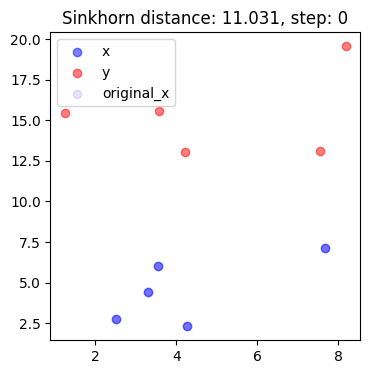

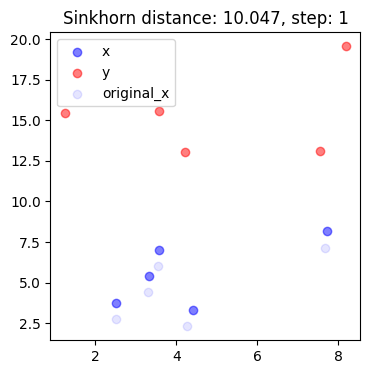

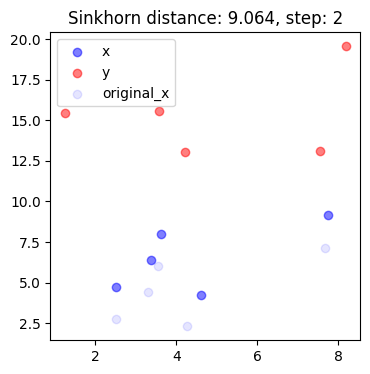

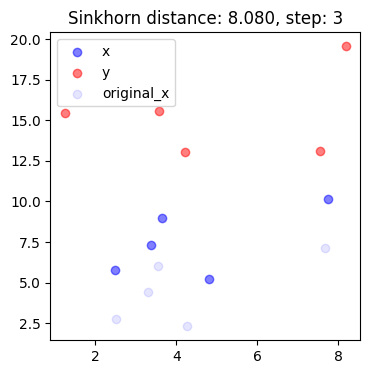

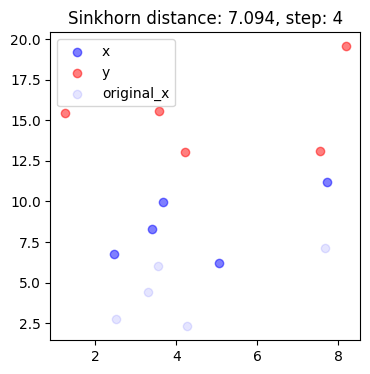

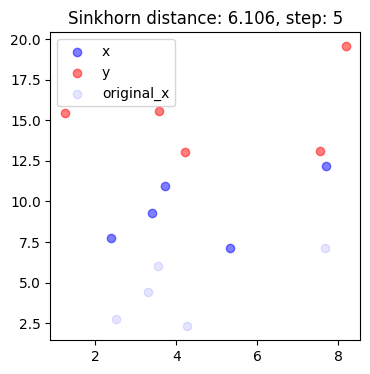

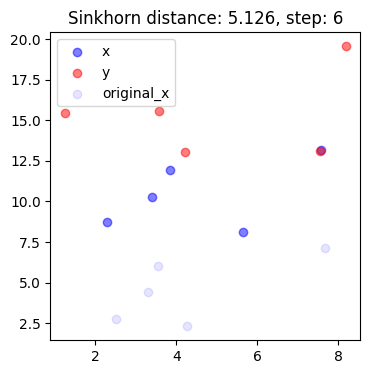

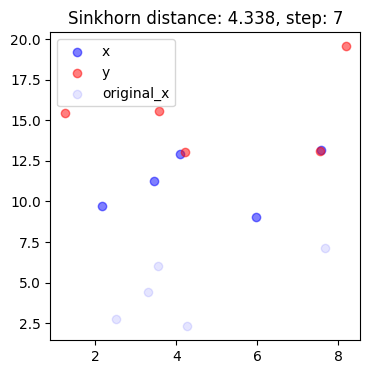

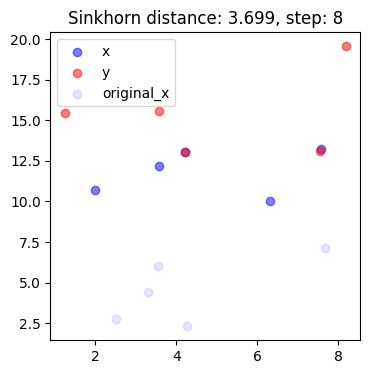

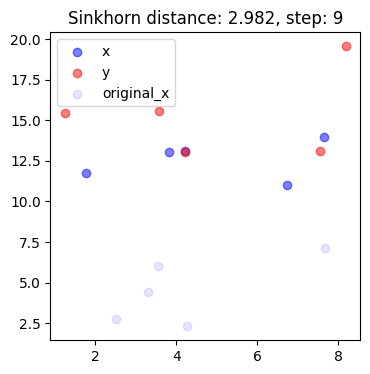

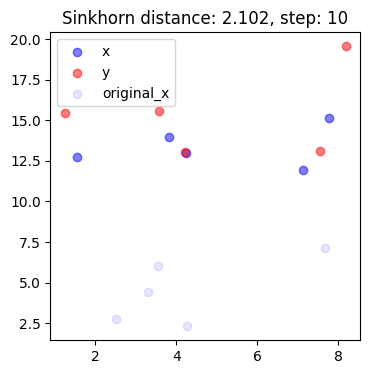

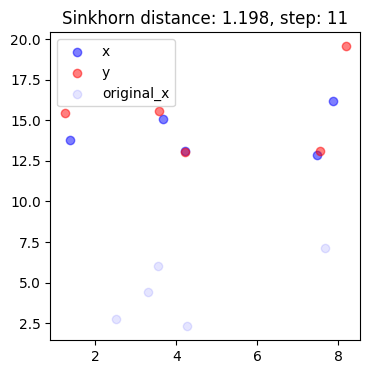

Error in callback <function _draw_all_if_interactive at 0x1333af1a0> (for post_execute), with arguments args (),kwargs {}:


NameError: name 'd_list' is not defined

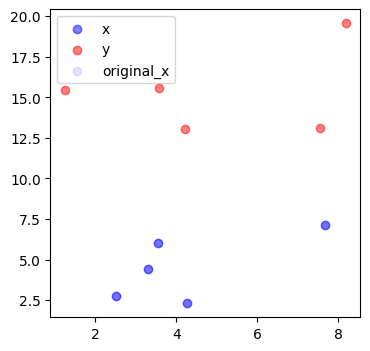

In [69]:
# gradient flow of Sinkhorn divergence
def Sinkhorn(a, b, x, y, eps):
    C = jnp.zeros((n, m))
    for i in range(n):
        for j in range(m):
            C = C.at[i,j].set(jnp.linalg.norm(x[i] - y[j]))
    K = jnp.exp(- C / eps)
    u = jnp.ones(n)
    v = jnp.ones(m)
    for i in range(1000):
        v = v.at[:].set(b / (K.T @ u))
        u = u.at[:].set(a / (K @ v))
    P = u.reshape(n, 1) * K * v.reshape(1, m)
    d = (C * P).sum()
    return d, P
x = jax.random.uniform(jax.random.PRNGKey(0), (n, 2)) * 10
y = jax.random.uniform(jax.random.PRNGKey(1), (m, 2)) * 10 + jnp.array([0, 10])
original_x = x.copy()
eps = 0.4
d = 1e10
i = 0
# animation of plot
import matplotlib.animation as animation
ims = []

def update(i):
    x = x_list[i]
    y = y_list[i]
    plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
    plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
    plt.scatter(original_x[:, 0], original_x[:, 1], color="blue", alpha=0.1, label="original_x")
    plt.legend()
    plt.title(f" step: {i}")
    return plt
x_list = []
y_list = []
while d > 1:
    d, P = Sinkhorn(a, b, x, y, eps)
    # plot x,y, and array of x
    if i % 10 == 0:
        plt.figure(figsize=(4, 4))
        plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
        plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
        plt.scatter(original_x[:, 0], original_x[:, 1], color="blue", alpha=0.1, label="original_x")
        plt.legend()
        plt.title(f"Sinkhorn distance: {d:.3f}, step: {i//10}")
        plt.show()
        x_list.append(x)
        y_list.append(y)


    # gradient of d wrt x
    grad_x = jax.grad(lambda x: Sinkhorn(a, b, x, y, eps)[0])(x)
    #print(grad_x)
    x -= 0.5 * grad_x
    i += 1

fig = plt.figure(figsize=(4, 4))


ani = animation.FuncAnimation(fig, update, interval=100, frames=len(x_list))


12


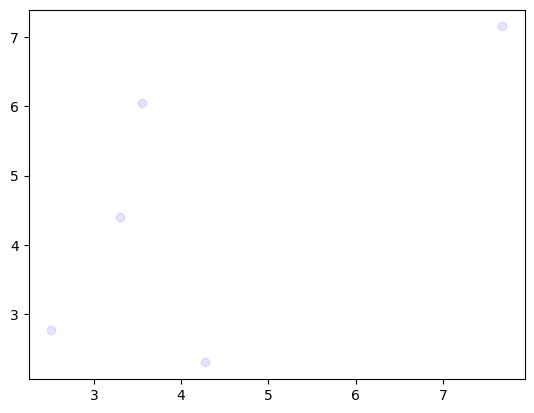

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [84]:
%matplotlib inline
fig, ax = plt.subplots()
scat3 = plt.scatter(original_x[:, 0], original_x[:, 1], color="blue", alpha=0.1, label="original_x")
def update(frame):
    # for each frame, update the data stored on each artist.
    x = x_list[frame]
    y = y_list[frame]
    scat = plt.scatter(x[:, 0], x[:, 1], color="blue", label="x", alpha=0.5)
    scat2 = plt.scatter(y[:, 0], y[:, 1], color="red", label="y", alpha=0.5)
    return scat, scat2
print(len(x_list))
anim = animation.FuncAnimation(fig, update, interval=100, frames=len(x_list))
plt.show()
from IPython.display import HTML
HTML(anim.to_html5_video())